In [1]:
from selenium import webdriver
from selenium.webdriver.support.ui import Select
import pandas as pd
import time
from datetime import date
import os.path
import numpy as np
from selenium.webdriver.common.keys import Keys
import glob
import os
import zipfile
from bs4 import BeautifulSoup
import re

import geopandas
import matplotlib.pyplot as plt
import contextily

# Get Daily Discharge Data

* Scrapes daily discharge data from kpud.org
* **Ouput**: 'KPUD_[Date of Scrape].csv'

In [84]:
today = date.today()
filename = 'KPUD_' + str(today).replace('-','_') + '.csv'

driver = webdriver.Chrome()
driver.get('http://kpudhydrodata.kpud.org/APSFED_DISCHARGE.aspx')

discharge_stations = driver.find_element_by_id('lstRainID')
station_list = discharge_stations.text
stations_list = station_list.split('\n')
len(stations_list)

i=len(stations_list)

for station in range(i):
    station_name = stations_list[station]
    print('Station {} of {}'.format(station, i))
    discharge_stations = driver.find_element_by_id('lstRainID')
    Select(discharge_stations).select_by_index(station)
    time.sleep(2)


    data_year = driver.find_element_by_id('lstBoxYear')
    year_list = data_year.text
    year_list = year_list.split('\n')
    print('There are {} years of data for this station'.format(len(year_list)))

    station_data = pd.DataFrame()
    j= len(year_list)

    for year in range(j):
        print('Year {} of {}'.format(year, j))
        try:
            data_year = driver.find_element_by_id('lstBoxYear')
            Select(data_year).select_by_index(year)
            time.sleep(2)

            data_table = driver.find_element_by_id('GridView1')
            data_list = data_table.text
            data_list = data_list.split('\n')
            data =  pd.DataFrame([x.split(' ')[:4] for x in data_list[1:]])


            cols = ['Date', 'Avg Discharge (cfs)','Max Discharge (cfs)','Min Discharge (cfs)']


            data.columns = cols
            data['Station'] = station_name


            if os.path.exists(filename):
                data.to_csv(filename, mode ='a', index = True, header=False)
            else:
                data.to_csv(filename, mode ='a', index = True)
        except:
            print('No data found for this year')
            pass

Station 0 of 45
There are 19 years of data for this station
Year 0 of 19
Year 1 of 19
Year 2 of 19
Year 3 of 19
Year 4 of 19
Year 5 of 19
Year 6 of 19
Year 7 of 19
Year 8 of 19
Year 9 of 19
Year 10 of 19
Year 11 of 19
Year 12 of 19
Year 13 of 19
Year 14 of 19
Year 15 of 19
Year 16 of 19
Year 17 of 19
Year 18 of 19
Station 1 of 45
There are 6 years of data for this station
Year 0 of 6
Year 1 of 6
Year 2 of 6
Year 3 of 6
Year 4 of 6
Year 5 of 6
Station 2 of 45
There are 1 years of data for this station
Year 0 of 1
No data found for this year
Station 3 of 45
There are 23 years of data for this station
Year 0 of 23
Year 1 of 23
Year 2 of 23
Year 3 of 23
Year 4 of 23
Year 5 of 23
Year 6 of 23
Year 7 of 23
Year 8 of 23
Year 9 of 23
Year 10 of 23
Year 11 of 23
Year 12 of 23
Year 13 of 23
Year 14 of 23
Year 15 of 23
Year 16 of 23
Year 17 of 23
Year 18 of 23
Year 19 of 23
Year 20 of 23
Year 21 of 23
Year 22 of 23
Station 4 of 45
There are 48 years of data for this station
Year 0 of 48
Year 1 of

There are 19 years of data for this station
Year 0 of 19
Year 1 of 19
Year 2 of 19
Year 3 of 19
Year 4 of 19
Year 5 of 19
Year 6 of 19
Year 7 of 19
Year 8 of 19
Year 9 of 19
Year 10 of 19
Year 11 of 19
Year 12 of 19
Year 13 of 19
Year 14 of 19
Year 15 of 19
Year 16 of 19
Year 17 of 19
Year 18 of 19


In [151]:
pd.read_csv('KPUD_2020_04_05.csv', index_col=0)

,Date,Avg Discharge (cfs),Max Discharge (cfs),Min Discharge (cfs),Station
0,10/01/2019,2.72,3.54,1.77,AC Anderson Creek - Bremerton
1,10/02/2019,2.46,3.25,1.77,AC Anderson Creek - Bremerton
2,10/03/2019,2.17,2.46,1.77,AC Anderson Creek - Bremerton
3,10/04/2019,2.07,2.71,1.35,AC Anderson Creek - Bremerton
4,10/05/2019,2.22,2.97,1.77,AC Anderson Creek - Bremerton
...,...,...,...,...,...
294,09/01/2001,0.58,0.58,0.58,WC Wildcat Creek @ Lake Outlet
295,09/02/2001,0.55,0.58,0.54,WC Wildcat Creek @ Lake Outlet
296,09/03/2001,0.54,0.54,0.54,WC Wildcat Creek @ Lake Outlet
297,09/04/2001,0.54,0.54,0.54,WC Wildcat Creek @ Lake Outlet


# Scrape well depth

* Scrapes well depth  data from kpud.org
* **Ouput**: 'KPUD_Well_Depth_[Date of Scrape].csv'

In [171]:

today = date.today()
filename = 'KPUD_Well_Depth_' + str(today).replace('-','_') + '.csv'

driver = webdriver.Chrome()
driver.get('http://kpudhydrodata.kpud.org/APSFED_WELLS.aspx')
time.sleep(2)
well_stations = driver.find_element_by_id('lstRainID')
well_list = well_stations.text
well_list = well_list.split('\n')

i = len(well_list)

for well in range(i):
    
    well_name = well_list[well]
    print('{} : well {} of {}'.format(well_name, well, i))
    
    try:
        well_stations = driver.find_element_by_id('lstRainID')
        Select(well_stations).select_by_index(well)
        time.sleep(2)


        start_years = driver.find_element_by_id('lstBoxYear')
        start_years_list = start_years.text.split('\n')
        Select(start_years).select_by_index(len(start_years_list)-1)
        time.sleep(2)


        end_years = driver.find_element_by_id('lstBoxYearEnd')
        Select(end_years).select_by_index(0)
        time.sleep(2)
        data_table = driver.find_element_by_id('GridView1')

        data_list = data_table.text
        data_list = data_list.split('\n')

        data = pd.DataFrame([x.split(' ')[:5] for x in data_list[1:]])

        cols = ['Date', 'Time', 'AM-PM', 'Water Level +/- MSL', 'Well Elevation']
        data.columns = cols

        data['Water Level +/- MSL'] = data['Water Level +/- MSL'].replace('',np.nan).astype(float)

        data['Well Name'] = well_name

        if os.path.exists(filename):
            data.to_csv(filename, mode ='a', index = True, header=False)
        else:
            data.to_csv(filename, mode ='a', index = True)
    except:
        print('Data not found')
        pass
            

AAA001  KPUD KEYPORT PRODUCTION WELL 1 : well 0 of 147
AAA002  KPUD KEYPORT PRODUCTION WELL 2 : well 1 of 147
AAA005  U.OF WA.SCH.OF FISHERIES BIG BEEF TEST HOLE 2 Upper 8" PERFORATIONS : well 2 of 147
AAA007  HOLLY WATER SYSTEM WELL 1 : well 3 of 147
AAA008  HOLLY WATER SYSTEM WELL 2 : well 4 of 147
AAA011  KPUD N PENINSULA SOUTH KINGSTON TEST WELL - OBS WELL : well 5 of 147
AAA012  KPUD N PENINSULA KINGSTON WELL 5 : well 6 of 147
AAA013  WISE ACRE (ORIGINALLY A PUD WELL CALLED INDIANOLA 5) : well 7 of 147
AAA014  KPUD INDIANOLA WELL 6 : well 8 of 147
AAA015  KPUD N PENINSULA GAMBLEWOOD 3 RITTER RD : well 9 of 147
AAA016  KPUD N PENINSULA GAMBLEWOOD 1 : well 10 of 147
AAA103  KPUD VINLAND WS EDGEWATER 4 : well 11 of 147
AAA104  KPUD VINLAND WS WELL 2 : well 12 of 147
AAA106  KPUD N PENINSULA KINGSTON WELL 4 : well 13 of 147
AAA107  KPUD N PENINSULA KINGSTON WELL 3 : well 14 of 147
AAA108  KPUD ISLAND UTILITY MONITORING WELL (160') : well 15 of 147
AAA109  KPUD ISLAND UTILITY WELL 1 : 

# Get Well Metadata

Wells can be lookup using https://appswr.ecology.wa.gov/wellconstruction/map/WCLSWebMap/textsearch.aspx
And entering the "dept. of ecology unique site identification tag number " which are the first 6 charactors of the well names


In [1]:
import pandas as pd

def get_site_data(site_id):
    well_search = 'https://appswr.ecology.wa.gov/wellconstruction/map/WCLSWebMap/TextSearch.aspx'
    span_id="ctl00_ContentPlaceHolder1_tbcMainContent_tbpWellIdSearch_tab"
    input_id = "ctl00_ContentPlaceHolder1_tbcMainContent_tbpWellIdSearch_txtWellTagLetters" 
    submit_id="ctl00_ContentPlaceHolder1_tbcMainContent_tbpWellIdSearch_btnTagIdSearch"
    download_id = "ctl00_ContentPlaceHolder1_lbtnDownloadRecords"
    agree_id = 'btnAgree'
    download_file_id="lnkDownLoadAscii"
    driver = webdriver.Chrome()
    try:
        driver.get(well_search)
        time.sleep(2)
        text_search_tab = driver.find_element_by_id(span_id)
        text_search_tab.click()
        time.sleep(1)
        driver.find_element_by_id(input_id).send_keys(site_id)
        time.sleep(1)
        driver.find_element_by_id(submit_id).click()
        time.sleep(1)
        driver.find_element_by_id(download_id).click()
        time.sleep(1)
        windows = driver.window_handles
        confirm_window = windows[1]
        driver.switch_to.window(confirm_window)
        driver.find_element_by_id(agree_id).click()
        time.sleep(1)
        driver.find_element_by_id(download_file_id).click()

        time.sleep(1)
        driver.quit()

        path = '/Users/garethwalker/Downloads/*' 
        list_of_files = glob.glob(path) # * means all if need specific format then *.csv
        latest_file = max(list_of_files, key=os.path.getctime)
        data = zipfile.ZipFile(latest_file)
        files_in_zip = data.namelist()
        indexes = [i for i,x in enumerate(files_in_zip) if '.csv' in x ]
        target_csv = files_in_zip[indexes[0]]
        well_data = pd.read_csv(data.open(target_csv))

    except:
        driver.quit()
        return np.nan
    return well_data




filename = "KPUD_Well_Depth_2020_04_05.csv"
all_data=pd.read_csv(filename, index_col=0)
all_data.index = pd.to_datetime(all_data.Date)
all_data  = all_data.drop('Date', axis=1)
all_data['Site_ID'] = all_data['Well Name'].apply(lambda x: x[:6])
site_ids = all_data['Site_ID'].unique()


In [145]:
wells_data = pd.DataFrame()

for site_id in site_ids:
    well_data = get_site_data(site_id)
    if isinstance(well_data, pd.DataFrame):
        wells_data = wells_data.append(well_data)
        
wells_data.to_csv('well_meta_data.csv')

# Translate Lat Long Values

Locations are given in State Plane Coordinate System X and Y (feet). The state coordinate system apears to be 4602 Washington South
This can be converted using http://www.earthpoint.us/StatePlane.aspx
    Confirmed with AAA002 , old military road, near Keyport

In [3]:
import pandas as pd
well_data =  pd.read_csv('well_meta_data.csv', index_col = 0)
well_data = well_data.reset_index(drop=True)

def return_lat_long(st_x, st_y):
    geolocate = "http://www.earthpoint.us/StatePlane.aspx"
    zone_id = "ContentPlaceHolder1_Zone"
    X_id = "ContentPlaceHolder1_X"
    Y_id = "ContentPlaceHolder1_Y"
    units_feet_id="ContentPlaceHolder1_rbUnitOfMeasure_1"
    calc_id="ContentPlaceHolder1_btnXYCalc_Button1"

    try:
        driver = webdriver.Chrome()
        driver.get(geolocate)
        time.sleep(1)
        driver.find_element_by_id(zone_id).send_keys('4602')
        driver.find_element_by_id(X_id).send_keys(str(st_x))
        driver.find_element_by_id(Y_id).send_keys(str(st_y))
        driver.find_element_by_id(units_feet_id).click()
        driver.find_element_by_id(calc_id).click()
        time.sleep(1)
        content = driver.page_source
        driver.quit()

        soup = BeautifulSoup(content)
        tables = soup.findChildren('table')
        text = tables[11].findChildren(['th', 'tr'])[10].text
        lat, long= re.sub('[^0-9,.]', "", text).split(',')
    except:
        lat, long = np.nan, np.nan
    return lat, long

well_data['lat'] = np.nan
well_data['lon'] = np.nan

for entry in well_data.index:
    stupid_x = well_data.loc[entry,'ST_PLANE_XCOORD_NR']
    stupid_y = well_data.loc[entry,'ST_PLANE_YCOORD_NR']
    well_data.loc[entry,['lat','lon']] = return_lat_long(stupid_x,stupid_y)
    
well_data.to_csv('well_meta_data.csv')

In [13]:
filename = "KPUD_Well_Depth_2020_04_05.csv"
well_depths =pd.read_csv(filename, index_col=0)
well_depths.index = pd.to_datetime(well_depths.Date)
well_depths  = well_depths.drop('Date', axis=1)
well_depths['Site_ID'] = well_depths['Well Name'].apply(lambda x: x[:6])
well_depths['Site_ID'] = well_depths['Site_ID'].str.upper()

In [14]:
well_data['Site_ID'] = well_data['well_tag_nr'].str.upper()

In [15]:
well_cols = list(well_data.columns.values)
well_cols.remove('geometry')

In [16]:
well_depths['Date'] = well_depths.index.values
well_master = well_depths.merge(well_data[kitsap_wells][well_cols], left_on = 'Site_ID', right_on= 'Site_ID', how ='left')

well_master = well_master.set_index('Date')

In [17]:
well_master = well_master.set_index('Date')

In [20]:
well_master

,Time,AM-PM,Water Level +/- MSL,Well Elevation,Well Name,Site_ID,well_log_id,well_tag_nr,nit_id_nr,well_depth_qt,...,qtr_qtr_section_cd,well_comp_dt,county_nm,well_type_cd,well_log_recv_dt,tax_parcel_nr,ST_PLANE_XCOORD_NR,ST_PLANE_YCOORD_NR,lat,lon
Date,,,,,,,,,,,,,,,,,,,,,
1975-07-14,12:00:00,AM,42.80,13.00,AAA001 KPUD KEYPORT PRODUCTION WELL 1,AAA001,66892.0,AAA001,NaN,746.0,...,NW,07/03/1975,Kitsap,W,NaN,NaN,1117063.0,869911.0,47.699297,-122.625306
1990-11-14,8:55:00,AM,35.16,13.00,AAA001 KPUD KEYPORT PRODUCTION WELL 1,AAA001,66892.0,AAA001,NaN,746.0,...,NW,07/03/1975,Kitsap,W,NaN,NaN,1117063.0,869911.0,47.699297,-122.625306
1991-01-11,7:30:00,AM,37.47,13.00,AAA001 KPUD KEYPORT PRODUCTION WELL 1,AAA001,66892.0,AAA001,NaN,746.0,...,NW,07/03/1975,Kitsap,W,NaN,NaN,1117063.0,869911.0,47.699297,-122.625306
1991-03-27,7:40:00,AM,37.47,13.00,AAA001 KPUD KEYPORT PRODUCTION WELL 1,AAA001,66892.0,AAA001,NaN,746.0,...,NW,07/03/1975,Kitsap,W,NaN,NaN,1117063.0,869911.0,47.699297,-122.625306
1991-04-22,7:35:00,AM,37.47,13.00,AAA001 KPUD KEYPORT PRODUCTION WELL 1,AAA001,66892.0,AAA001,NaN,746.0,...,NW,07/03/1975,Kitsap,W,NaN,NaN,1117063.0,869911.0,47.699297,-122.625306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-09,12:00:00,PM,215.02,286.78,BHN761 KPUD PORT GAMBLE LOSS MW-1,BHN761,895070.0,BHN761,RE08832,90.0,...,NW,08/22/2013,Kitsap,R,12/12/2013,NaN,1126431.0,922463.0,47.843978,-122.592942
2018-01-17,1:30:00,PM,226.22,286.78,BHN761 KPUD PORT GAMBLE LOSS MW-1,BHN761,895070.0,BHN761,RE08832,90.0,...,NW,08/22/2013,Kitsap,R,12/12/2013,NaN,1126431.0,922463.0,47.843978,-122.592942
2018-05-08,9:50:00,AM,220.63,286.78,BHN761 KPUD PORT GAMBLE LOSS MW-1,BHN761,895070.0,BHN761,RE08832,90.0,...,NW,08/22/2013,Kitsap,R,12/12/2013,NaN,1126431.0,922463.0,47.843978,-122.592942


In [112]:
well_master['2020-01-01']

,Time,AM-PM,Water Level +/- MSL,Well Elevation,Well Name,Site_ID,well_log_id,well_tag_nr,nit_id_nr,well_depth_qt,...,qtr_qtr_section_cd,well_comp_dt,county_nm,well_type_cd,well_log_recv_dt,tax_parcel_nr,ST_PLANE_XCOORD_NR,ST_PLANE_YCOORD_NR,lat,lon
Date,,,,,,,,,,,,,,,,,,,,,


In [116]:
well_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44705 entries, 0 to 44704
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Time                 44705 non-null  object        
 1   AM-PM                44705 non-null  object        
 2   Water Level +/- MSL  44598 non-null  float64       
 3   Well Elevation       44598 non-null  float64       
 4   Well Name            44705 non-null  object        
 5   Site_ID              44705 non-null  object        
 6   Date                 44705 non-null  datetime64[ns]
 7   well_log_id          33944 non-null  float64       
 8   well_tag_nr          33944 non-null  object        
 9   nit_id_nr            9964 non-null   object        
 10  well_depth_qt        32072 non-null  float64       
 11  well_diameter_qt     29191 non-null  float64       
 12  well_owner_nm        33944 non-null  object        
 13  township_nr          33944 non-

In [160]:
regrouped = well_depths.groupby('Site_ID').resample('M').max()

In [161]:
regrouped.index[1][0]

'AAA001'

In [179]:
site_ids = well_depths['Site_ID'].unique()
agrigated  = regrouped.loc[site_ids,'Water Level +/- MSL'].reset_index()
cols =['Site_ID', 'lat', 'lon']
agrigated = agrigated.merge(well_data[kitsap_wells][cols], left_on = 'Site_ID', right_on= 'Site_ID', how ='left')
month_mask = agrigated['Date'].apply(lambda x: x.month) ==6
year_mask = agrigated['Date'].apply(lambda x: x.year) == 2019
find_month = month_mask & year_mask
selected = agrigated[find_month].dropna()
extent = x_extent = x_min, x_max, y_min, y_max = [selected.lat.min()-0.1, selected.lat.max()+0.1,
                                                  selected.lon.min()-0.1, selected.lon.max()+0.1]
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(selected.lat, selected.lon, c=selected['Water Level +/- MSL'])
ax.set_aspect(1)
ax.set_xlim(*extent[:2])
ax.set_ylim(*extent[2:])
ax.set_xlabel('Easting [m]')
ax.set_ylabel('Northing [m]')
ax.set_title('Water Level')
ax.grid(c='k', alpha=0.2)

In [353]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF,WhiteKernel
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from scipy.interpolate import griddata


grid_x, grid_y = np.mgrid[x_min:x_max:0.01, y_min:y_max:0.01]

X = selected[['lat','lon']].values
y= selected['Water Level +/- MSL'].values
grid_z0 = griddata(X, y, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(X, y, (grid_x, grid_y), method='linear')
grid_z2 = griddata(X, y, (grid_x, grid_y), method='cubic')

fig, axs = plt.subplots(ncols=3, figsize=(15, 5))

ax = axs[0]
ax.imshow(grid_z0, origin='lower', extent=extent)
#ax.scatter(X, y, s=2, c='w')
ax.set_title('Nearest')

ax = axs[1]
ax.imshow(grid_z1, origin='lower', extent=extent)
#ax.scatter(X, y, s=2, c='w')
ax.set_title('Linear')

ax = axs[2]
ax.imshow(grid_z2, origin='lower', extent=extent)
#ax.scatter(X, y, s=2, c='w')
ax.set_title('Cubic')


In [356]:
from scipy.interpolate import griddata

Text(0.5, 1.0, 'Cubic')

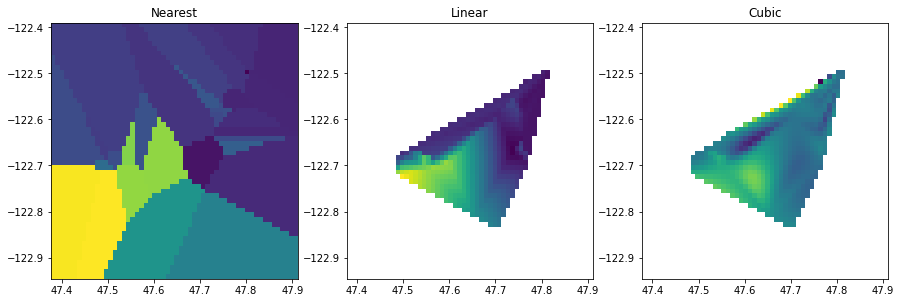

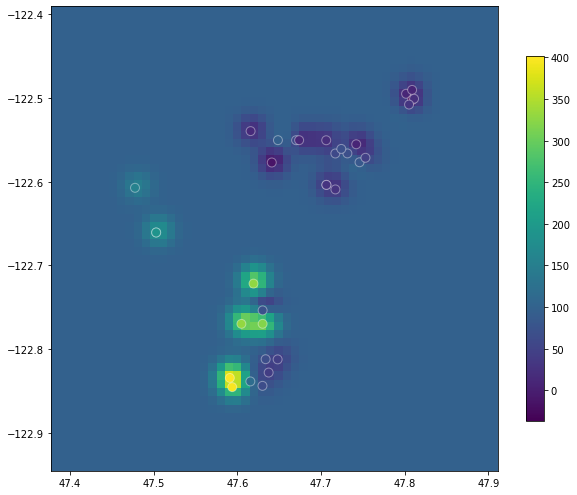

In [355]:
kernel = RBF(length_scale=1050)
model = GaussianProcessRegressor(normalize_y=True,
                              alpha=0.101,  # Larger values imply more noise in the input data.
                              kernel=kernel)

X = selected[['lat','lon']].values
y= selected['Water Level +/- MSL'].values
model.fit(X,y)
X_grid = np.stack([grid_x.ravel(), grid_y.ravel()]).T
y_grid = model.predict(X_grid).reshape(grid_x.shape)

mi = np.min(np.hstack([y_grid.ravel(), selected['Water Level +/- MSL']]))
ma = np.max(np.hstack([y_grid.ravel(), selected['Water Level +/- MSL']]))

# Plot it all.
plt.figure(figsize=(10,10))
im = plt.imshow(y_grid.T, origin='lower', extent=extent, vmin=mi, vmax=ma)
pts = plt.scatter(selected.lat, selected.lon, c=selected['Water Level +/- MSL'], s=80, edgecolor='#ffffff66', vmin=mi, vmax=ma)
plt.colorbar(im, shrink=0.67)
plt.show()

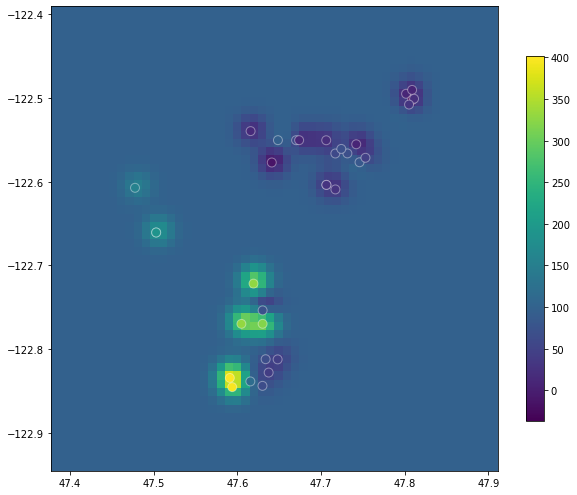

In [338]:
#model = GradientBoostingRegressor(n_estimators = 2000)
kernel = RBF(length_scale=1005)
model = GaussianProcessRegressor(normalize_y=True,
                              alpha=0.101,  # Larger values imply more noise in the input data.
                              kernel=kernel)

X = selected[['lat','lon']].values
y= selected['Water Level +/- MSL'].values
model.fit(X,y)
X_grid = np.stack([grid_x.ravel(), grid_y.ravel()]).T
y_grid = model.predict(X_grid).reshape(grid_x.shape)

mi = np.min(np.hstack([y_grid.ravel(), selected['Water Level +/- MSL']]))
ma = np.max(np.hstack([y_grid.ravel(), selected['Water Level +/- MSL']]))

# Plot it all.
plt.figure(figsize=(10,10))
im = plt.imshow(y_grid.T, origin='lower', extent=extent, vmin=mi, vmax=ma)
pts = plt.scatter(selected.lat, selected.lon, c=selected['Water Level +/- MSL'], s=80, edgecolor='#ffffff66', vmin=mi, vmax=ma)
plt.colorbar(im, shrink=0.67)
plt.show()

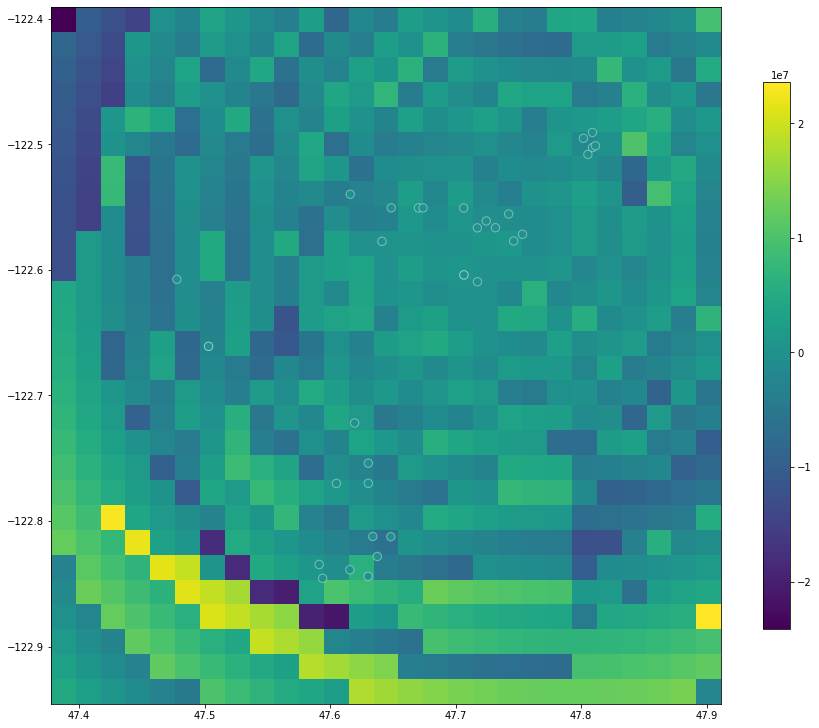

In [271]:
from scipy.interpolate import Rbf
grid_x, grid_y = np.mgrid[x_min:x_max:0.02, y_min:y_max:0.02]

# Make an n-dimensional interpolator. This is essential line number 4.
rbfi = Rbf(selected.lat, selected.lon, selected['Water Level +/- MSL'])

# Predict on the regular grid. Line 5.
di = rbfi(grid_x,grid_y)

mi = np.min(np.hstack([di.ravel(), selected['Water Level +/- MSL'].values]))
ma = np.max(np.hstack([di.ravel(), selected['Water Level +/- MSL'].values]))

plt.figure(figsize=(15,15))
c1 = plt.imshow(di.T, origin="lower", extent=extent, vmin=mi, vmax=ma)
c2 = plt.scatter(selected.lat, selected.lon, s=70, c=selected['Water Level +/- MSL'], edgecolor='#ffffff66', vmin=mi, vmax=ma)

plt.colorbar(c1, shrink=0.67)
plt.show()

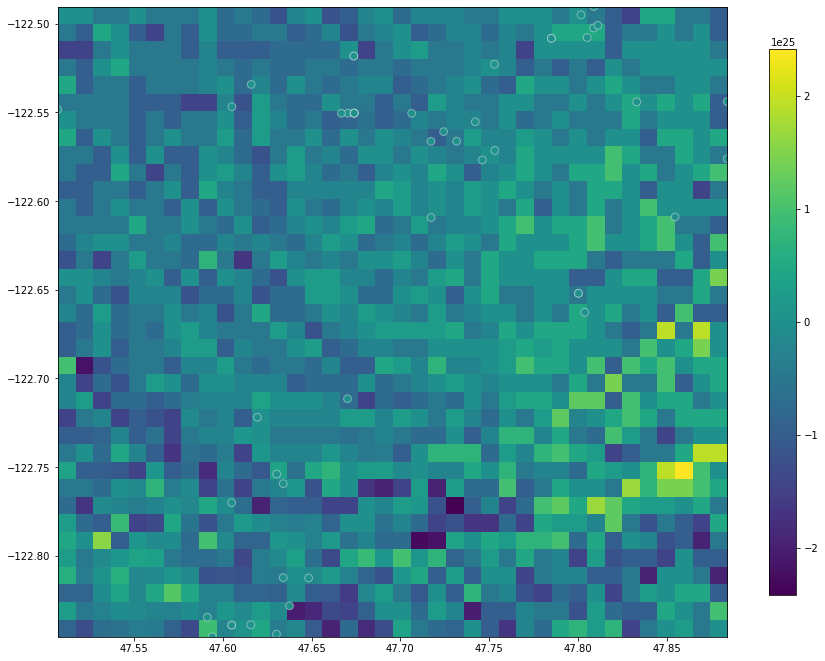